In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

Load the Data

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


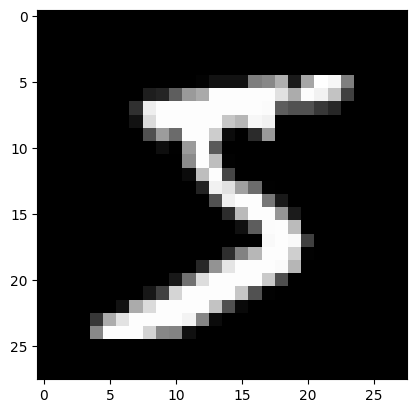

In [23]:
plt.imshow(X_train[0], cmap='gray')

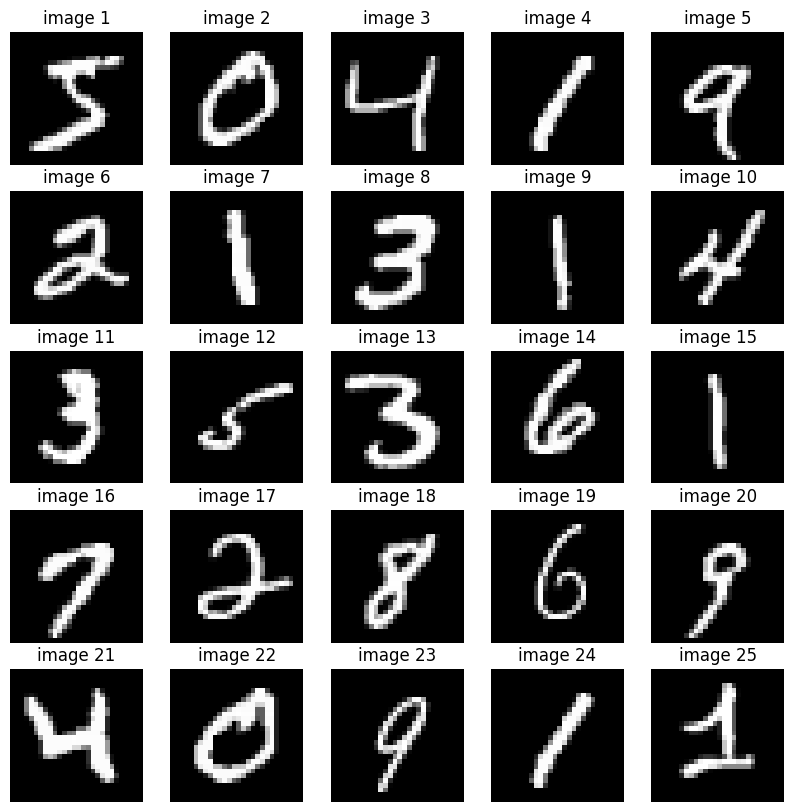

In [24]:
plt.figure(figsize=(10, 10))

for i in range (0,25):
    plt.subplot(5, 5 , i+1)
    plt.title(f'image {i+1}')
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off') # Remove x and y axis marked

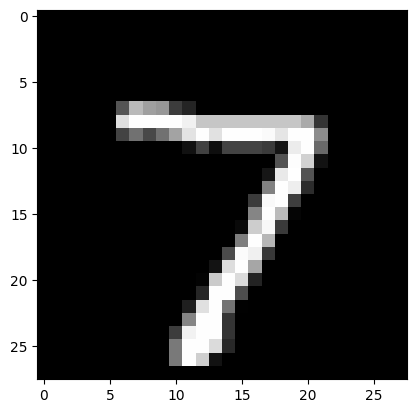

In [25]:
plt.imshow(X_test[0], cmap='gray')

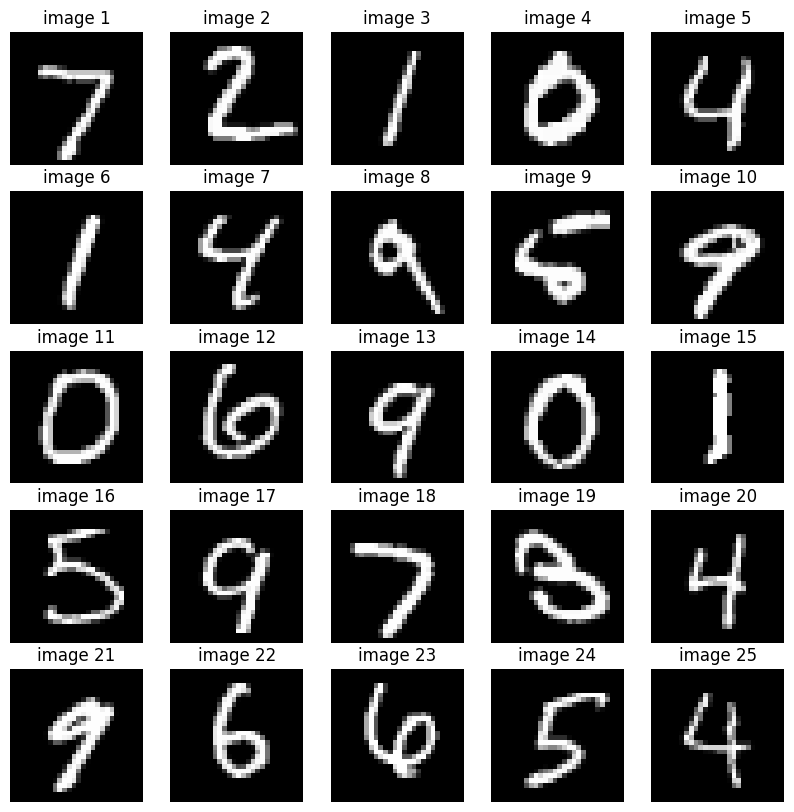

In [26]:
plt.figure(figsize=(10, 10))

for i in range (0,25):
    plt.subplot(5, 5 , i+1)
    plt.title(f'image {i+1}')
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off') # Remove x and y axis marked

Data Preparation

In [27]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Normalize

In [28]:
X_train = X_train/ 255
X_test = X_test/ 255

Convert 2d Data to 1D

In [29]:
X_train[0].shape

(28, 28)

In [33]:
X_train[0].size # 28 * 28

784

In [34]:
# Flatten, Reshape

m = np.array([[6, 3, 1], [8, 8, 7]])
m

array([[6, 3, 1],
       [8, 8, 7]])

In [35]:
m.flatten()

array([6, 3, 1, 8, 8, 7])

In [36]:
m.reshape(m.size)

array([6, 3, 1, 8, 8, 7])

In [37]:
np.reshape(m, m.size)

array([6, 3, 1, 8, 8, 7])

In [38]:
X_train = X_train.reshape(-1, X_train[0].size)
X_test = X_test.reshape(-1, X_test[0].size)

In [39]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Prepare the Output Variable

In [40]:
import seaborn as sns

<Axes: xlabel='count'>

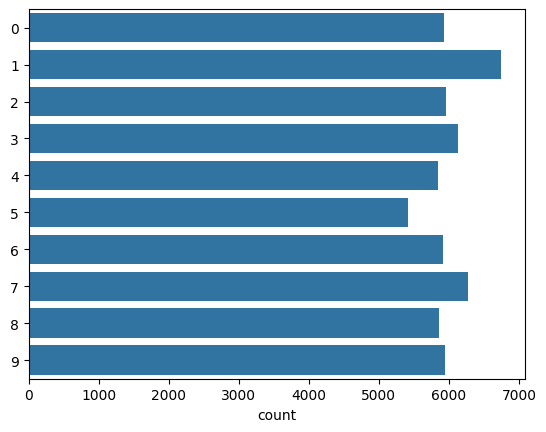

In [41]:
sns.countplot(y= y_train)

<Axes: xlabel='count'>

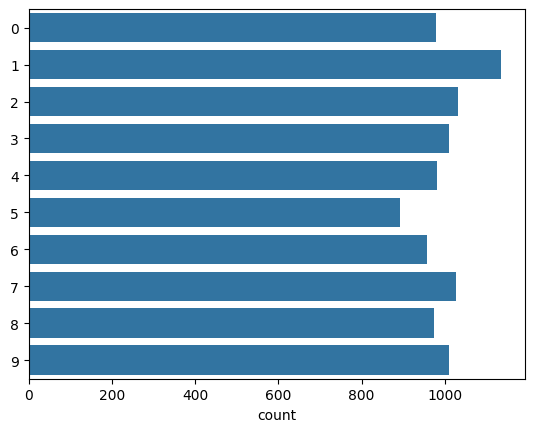

In [42]:
sns.countplot(y= y_test)

In [43]:
y_train.shape

(60000,)

In [44]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [45]:
y_train.shape

(60000, 10)

In [46]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Build the model

In [48]:
model = Sequential()

# Input Layer
model.add(Dense(512, input_shape= (784, ), activation= 'relu'))

# Hidden Layer
model.add(Dense(128, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))

# Output layer
model.add(Dense(10, activation= 'softmax'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 472042 (1.80 MB)
Trainable params: 472042 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


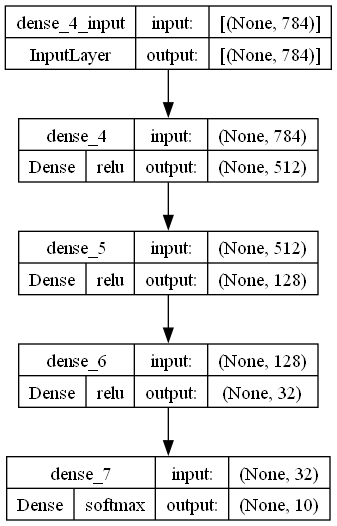

In [54]:
plot_model(model, show_layer_activations= True, show_layer_names= True, show_shapes= True)

Compile the Model

In [59]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Train the Model

In [60]:
model.fit(X_train, y_train, epochs= 10, batch_size= 10)

Epoch 1/10


6000/6000 [==============================] - 29s 5ms/step - loss: 0.2011 - accuracy: 0.9397
Epoch 2/10
6000/6000 [==============================] - 27s 4ms/step - loss: 0.0955 - accuracy: 0.9707
Epoch 3/10
6000/6000 [==============================] - 27s 4ms/step - loss: 0.0691 - accuracy: 0.9785
Epoch 4/10
6000/6000 [==============================] - 28s 5ms/step - loss: 0.0571 - accuracy: 0.9831
Epoch 5/10
6000/6000 [==============================] - 27s 5ms/step - loss: 0.0469 - accuracy: 0.9862
Epoch 6/10
6000/6000 [==============================] - 27s 5ms/step - loss: 0.0387 - accuracy: 0.9883
Epoch 7/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0352 - accuracy: 0.9899
Epoch 8/10
6000/6000 [==============================] - 27s 5ms/step - loss: 0.0309 - accuracy: 0.9908
Epoch 9/10
6000/6000 [==============================] - 27s 5ms/step - loss: 0.0290 - accuracy: 0.9916
Epoch 10/10
6000/6000 [==============================] - 27s 5ms/step -

Evaluation on test Data

In [61]:
model.evaluate(X_test, y_test, batch_size= 1)

10000/10000 [==============================] - 26s 3ms/step - loss: 0.1042 - accuracy: 0.9799


[0.10417883098125458, 0.9799000024795532]

Predict on New Image

In [100]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [101]:
new = X_test[1234]

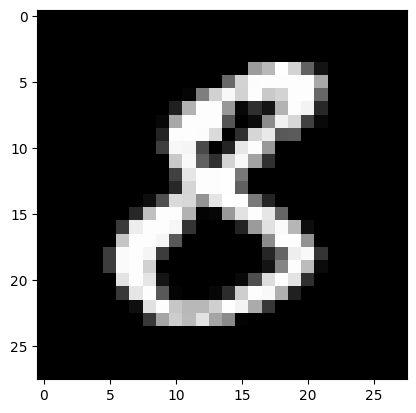

In [102]:
plt.imshow(new, cmap='gray')

In [103]:
new = new/255

In [104]:
new.size

784

In [105]:
new = new.reshape(-1, new.size)
new

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [98]:
new.size

784

In [107]:
y_pred = model.predict(new, batch_size=1)
np.argmax(y_pred)

1/1 [==============================] - 0s 53ms/step


8

Predict from image

In [174]:
import cv2

In [175]:
img = cv2.imread('2.png', 0)
img = cv2.resize(img, (28,28)) # Resize as the original size is not 28*28 and we need it in 28*28 as the model is trained over it.

In [176]:
print(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 120
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 139
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 121 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

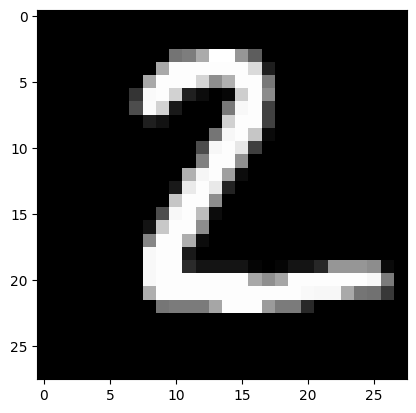

In [177]:
plt.imshow(img, cmap='gray')

In [178]:
img.shape

(28, 28)

In [179]:
img = img/ 255
img = img.reshape(-1, img.size)
img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [180]:
img.size

784

In [181]:
y_pred = model.predict(img, batch_size=1)
np.argmax(y_pred)

1/1 [==============================] - 0s 26ms/step


2